#Introduction

.....


Check to see if jupyter lab uses the correct python interpreter with '!which python'.
It should be something like '/opt/anaconda3/envs/[environment name]/bin/python' (on Mac).
If not, try this: https://github.com/jupyter/notebook/issues/3146#issuecomment-352718675

In [1]:
!which python

Der Befehl "which" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


# Install dependencies:

In [2]:
install_packages = False
if install_packages:
    !conda install tensorflow=2 -y
    !conda install -c anaconda pandas -y
    !conda install -c conda-forge tensorflow-hub -y
    !conda install -c akode html2text -y
    !conda install -c conda-forge tqdm -y
    !conda install -c anaconda scikit-learn -y
    !conda install -c conda-forge matplotlib -y
    !conda install -c anaconda seaborn -y

# Imports

In [3]:
#imports
import pandas as pd
import numpy as np
import os
import time
import tensorflow as tf
import tensorflow_hub as hub
import zipfile
from html2text import HTML2Text
from tqdm import tqdm
import re
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns

# Set pandas print options
This will improve readability of printed pandas dataframe.


In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Set global Parameters
Set your parameters here:

data_path: In this path put the data you have downloaded with YouTube Data Tools. 
output_path: Tghe files generated in this notebook will be saved here.

url_dict: URLs to models on Tensorflow hub are saved here. Other models are available there.
model_type: Define which model you would like to use. Choose one from url_dict

new_embeddings: If this is true, new embeddings will be generated and saved at output_path. Otherwise, embeddings are loaded from Disc.




In [5]:
data_path = './data/videoinfo_XGVUV2tpR5g_2020_11_22-16_27_17_comments.csv'
output_path = "./output/"

new_embeddings = True

url_dict = {
            'Transformer' : "https://tfhub.dev/google/universal-sentence-encoder-large/5",
            'DAN' : "https://tfhub.dev/google/universal-sentence-encoder/4",
            'Transformer_Multilingual': "https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3"
}

model_type = 'Transformer' #@param ['DAN','Transformer','Transformer_Multilingual']

## Create output directory
Try to create the directory defined by output_path

In [6]:
try:
    os.mkdir(output_path)
except OSError:
    print ("Creation of the directory %s failed" % output_path)
else:
    print ("Successfully created the directory %s " % output_path)


Creation of the directory ./output/ failed


# Load Data
Load you data as a pandas dataframe

In [7]:
if new_embeddings:
    data = pd.read_csv(data_path,sep='\t',header=(0))
    data.head()

# Preprocessing
Preprocess your data:
- Drop empty rows
- Drop unused columns

In [8]:
if new_embeddings:
    data = data.dropna(subset=['text', 'authorName']) # drop rows with no content
    data=data.drop(['id', 'replyCount','likeCount','authorChannelUrl','authorChannelId','isReplyTo','isReplyToName'],axis=1) # drop unused columns
    data.head()

- remove HTML-tags, links and usernames

In [9]:
if new_embeddings:
    # Remove HTML tags
    tqdm.pandas()
    h = HTML2Text()
    h.ignore_links = True
    data['cleaned'] = data['text'].progress_apply(lambda x: h.handle(x))
    print( "Removed HTML Tags.")

    # Remove links
    http_link_pattern = r'http\S+'
    bitly_link_pattern = r'bit.ly/\S+'
    data['cleaned'] = data['cleaned'].str.replace(http_link_pattern, '')
    data['cleaned'] = data['cleaned'].str.replace(bitly_link_pattern, '')
    print( "Removed Links.")

    # Remove user names
    keep_names = ["earth", "Tide", "Geologist", "A Person", "Titanic", "adventure", "Sun", "The United States Of America"] # user names we want to keep
    user_names = [name for name in data['authorName'].unique() if (len(name)> 3 and name not in keep_names)]
    data['cleaned'] = data['cleaned'].str.replace('|'.join(map(re.escape, user_names)), '')
    print( "Removed user names.")

C:\ProgramData\Anaconda3\lib\site-packages\tqdm\std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 769/769 [00:00<00:00, 7949.69it/s]


Removed HTML Tags.
Removed Links.
Removed user names.


# Save or Load preprocessed data

Save your data afte preprocessing, or load preprocessed data from disc.

In [10]:
if new_embeddings:
    data.to_pickle(output_path+'data_preprocessed'+'.pkl')
else:
    data = pd.read_pickle(output_path+'data_preprocessed'+'.pkl')
data.head()

publishedAt         authorName  \
0  2020-11-22 10:41:22           Pf√∂tchen   
1  2020-11-21 10:28:58      Der Rezensent   
2  2020-11-19 20:33:44  Baggi Djunglebook   
3  2020-11-19 09:59:11       Peter Penner   
4  2020-11-19 08:39:25       Paul Leitner   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          ‚ù§   
1  Habt ihr von der AfD wirklich keine Agenden mehr mit politischen Inhalten und m√ºsst nun stattdessen eure freilaufenden Mitl√§ufer in den Bundestag schicken um eure Kontrahenten mittels pers√∂nlichem Angehen zu verschrecken? War das so gemeint mit: &quot;Wir werden sie jagen!&quot;? Was kommt als N√§chstes? Lasst ihr nun &quot;auf Kinder schie√üen&quot;? ako Frau von Storch! Ist damit gemeint: &quot;Wir holen uns unser Land zur√ºck!&quot;? Oder war das Ganze nur ein &quot;Vogelschiss&quot;?   
2                                                                                                                                                                                                                                                                                                                                                                                                                                  Glaube nur der Statistik dir Du selber gef√§lscht hast. <br /><br />Passt.   
3                                                                                                                                                                                                                      ...die Bildung in Deutschland wurde in der letzten 30 Jahre sehr vernachl√§ssigt - das habe ich gem√§rkt als ich 1989 nach Deutschland kam und meine Kinder, eines nach dem anderen zur Schule gingen. Weswegen m√ºssen wir uns auch nicht wundern, das man ihnen alles vorgaukeln kann.   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Sehr sehr sch√∂ne Rede :D   

   isReply  \
0        0   
1        0   
2        0   
3        0   
4        0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                      cleaned  
0                                                                                                                                                                                                       

# Produce Text Embeddings with Universal Sentence Encoder

## Load Model
Load the model from TF-hub

In [11]:
hub_url = url_dict[model_type]
if new_embeddings:
    print("Loading model. This will take some time...")
    embed = hub.load(hub_url)

Loading model. This will take some time...


## Embed Documents
Produce embeddings of your documents.

In [12]:
if new_embeddings:
    for k,g in data.groupby(np.arange(len(data))//200):
        if k == 0:
            embeddings = embed(g['cleaned'])
        else:
            embeddings_new = embed(g['cleaned'])
            embeddings = tf.concat(values=[embeddings,embeddings_new],axis = 0)
            print(k , end =" ")
    print("The embeddings vector is of fixed length {}".format(embeddings.shape[1]))

    np.save(output_path+'/embeddings'+model_type+'.npy', embeddings, allow_pickle=True, fix_imports=True)
else:
    embeddings = np.load(output_path+'/embeddings'+model_type+'.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')

embeddings.shape

1 2 3 The embeddings vector is of fixed length 512


TensorShape([769, 512])

## Calculate Similarity Matrix with angular distance

'Following Cer et al. (2018), we first compute
the sentence embeddings u, v for an STS sentence
pair, and then score the sentence pair similarity
based on the angular distance between the two
embedding vectors  d = ‚àí arccos (uv/||u|| ||v||).'

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
def cos_sim(input_vectors):
    similarity = cosine_similarity(input_vectors)
    return similarity
cosine_similarity_matrix = cos_sim(np.array(embeddings))
print(cosine_similarity_matrix)

[[1.         0.01727337 0.04225923 ... 0.0067451  0.07492081 0.06325494]
 [0.01727337 1.0000002  0.6422694  ... 0.5387074  0.3547926  0.44816566]
 [0.04225923 0.6422694  1.         ... 0.5989609  0.5368384  0.6492388 ]
 ...
 [0.0067451  0.5387074  0.5989609  ... 0.99999976 0.5447934  0.5652996 ]
 [0.07492081 0.3547926  0.5368384  ... 0.5447934  1.0000001  0.5847877 ]
 [0.06325494 0.44816566 0.6492388  ... 0.5652996  0.5847877  1.        ]]


# Plots Similarity 
Plot and print a heat map showing the semantic contextual similarity between comments.

769


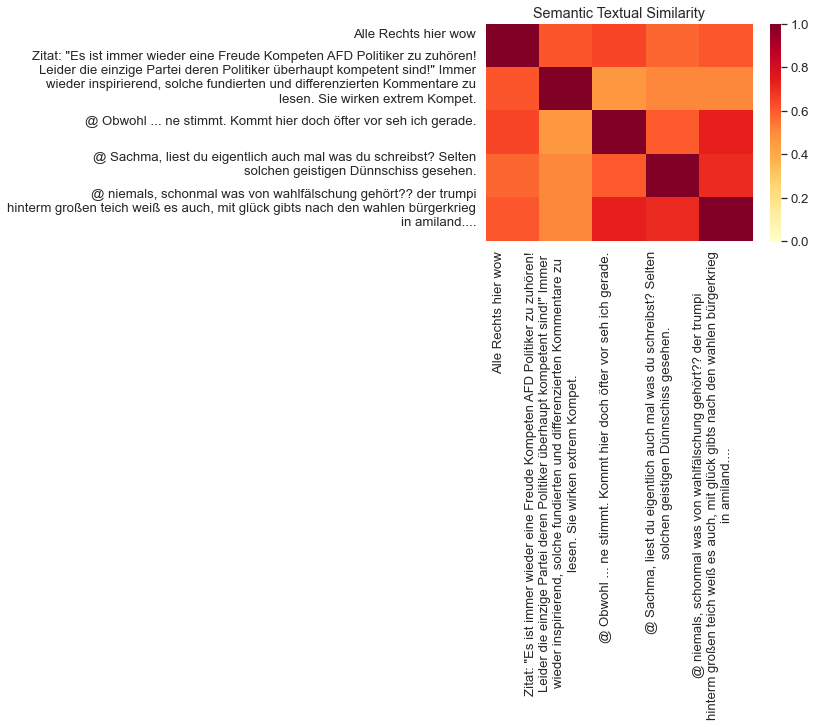

In [14]:
import seaborn as sns
def plot_similarity(labels, features, rotation):
    #print('label: ',labels)
    #print('feature: ',features)
    #print('rotation: ',rotatation)
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
    corr,
    xticklabels=labels,
    yticklabels=labels,
    vmin=0,
    vmax=1,
    cmap="YlOrRd")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")

num_samples = 5
off_set = 700

print(len(data['cleaned']))

plot_similarity(data.iloc[off_set:off_set+num_samples]['cleaned'], embeddings[off_set:off_set+num_samples], 90)

# Show neighbours of a comment 
Define which comment to analyze

In [15]:
comment_index = 324
comment = data["cleaned"][comment_index]
comment_list = data["cleaned"].tolist()
print(comment)

@ Um diskutieren zu k√∂nnen, m√ºsstest du dich erst einmal
anderweitig informieren, bis dahin hast du nichts zu diskutieren.




Print similar comments.

In [18]:
def get_top_similar(sentence, sentence_list, similarity_matrix, topN):
    # find the index of sentence in list
    index = sentence_list.index(sentence)
    # get the corresponding row in similarity matrix
    similarity_row = np.array(similarity_matrix[index, :])
    # get the indices of top similar
    indices = similarity_row.argsort()[-topN:][::-1]
    return [sentence_list[i] for i in indices]


for i, value in enumerate(get_top_similar(comment, comment_list, cosine_similarity_matrix, 750)):
    print("Top similar comment {}: {}".format(i+1, value))

Top similar comment 1: @ Um diskutieren zu k√∂nnen, m√ºsstest du dich erst einmal
anderweitig informieren, bis dahin hast du nichts zu diskutieren.


Top similar comment 2: Ich glaube nicht dass die Pfosten da unten dieses M√§rchen verstehen,
hochgebildet wie die nun mal sind.


Top similar comment 3: wie hei√üt es doch sch√∂n: Sie haben ja Recht, aber ich sehe das anders...


Top similar comment 4: Die Argumente sind ja bekannt. Gegenargument ist dann, dass sich das Klima
noch nie so schnell ver√§ndert hat...


Top similar comment 5: Falsch! Es gibt neben den strunzd√§mlichen Altparteien viele gute Kleinparteien
mit kompetenten Politikern :)


Top similar comment 6: So viel Inkompetenz kann man sich nicht geben!


Top similar comment 7: Endlich sagt es mal einer! Dankesch√∂n üôè


Top similar comment 8: @ Doch, doch. Die haben sogar Ghirnzellen im Kopf. Zwei St√ºck. Und
das Jeder. Was meinst Du ist da los, wenn die beiden sich mal √ºber den Weg
laufen?


Top similar comment 9: Die Kl